In [28]:
%matplotlib inline


# Robust covariance estimation and Mahalanobis distances relevance


An example to show covariance estimation with the Mahalanobis
distances on Gaussian distributed data.

For Gaussian distributed data, the distance of an observation
$x_i$ to the mode of the distribution can be computed using its
Mahalanobis distance: $d_{(\mu,\Sigma)}(x_i)^2 = (x_i -
\mu)'\Sigma^{-1}(x_i - \mu)$ where $\mu$ and $\Sigma$ are
the location and the covariance of the underlying Gaussian
distribution.

In practice, $\mu$ and $\Sigma$ are replaced by some
estimates.  The usual covariance maximum likelihood estimate is very
sensitive to the presence of outliers in the data set and therefor,
the corresponding Mahalanobis distances are. One would better have to
use a robust estimator of covariance to guarantee that the estimation is
resistant to "erroneous" observations in the data set and that the
associated Mahalanobis distances accurately reflect the true
organisation of the observations.

The Minimum Covariance Determinant estimator is a robust,
high-breakdown point (i.e. it can be used to estimate the covariance
matrix of highly contaminated datasets, up to
$\frac{n_\text{samples}-n_\text{features}-1}{2}$ outliers)
estimator of covariance. The idea is to find
$\frac{n_\text{samples}+n_\text{features}+1}{2}$
observations whose empirical covariance has the smallest determinant,
yielding a "pure" subset of observations from which to compute
standards estimates of location and covariance.

The Minimum Covariance Determinant estimator (MCD) has been introduced
by P.J.Rousseuw in [1].

This example illustrates how the Mahalanobis distances are affected by
outlying data: observations drawn from a contaminating distribution
are not distinguishable from the observations coming from the real,
Gaussian distribution that one may want to work with. Using MCD-based
Mahalanobis distances, the two populations become
distinguishable. Associated applications are outliers detection,
observations ranking, clustering, ...
For visualization purpose, the cubic root of the Mahalanobis distances
are represented in the boxplot, as Wilson and Hilferty suggest [2]

[1] P. J. Rousseeuw. Least median of squares regression. J. Am
    Stat Ass, 79:871, 1984.
[2] Wilson, E. B., & Hilferty, M. M. (1931). The distribution of chi-square.
    Proceedings of the National Academy of Sciences of the United States
    of America, 17, 684-688.




This is a script for running my new iterative method. PCA components are set to 4 for the best results. fake is a variable that is flipped on for the images that 

In [29]:
%load_ext autoreload
%autoreload 2
from iterative_gmm import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
I = I_gmm()

-35284.74759711604
-35284.74759711604
-1
0
1
-35465.87199561756
-35465.87199561756
-1
0
1
-35613.43066803116
-35613.43066803116
-1
0
1
-35641.047899360936
-35641.047899360936
-1
0
1
-35661.75578974077
-35661.75578974077
-1
0
1
-35954.83947362148
-35954.83947362148
-1
0
1
-36100.10360520818
-36100.10360520818
-1
0
1
-36124.702781863176
-36124.702781863176
-1
0
1
-36147.10822755271
-36147.10822755271
-1
0
1
-36155.636303101535
-36155.636303101535
-1
0
1
-36152.51870653129
BIC got higher
-1
0
1


<Figure size 720x720 with 0 Axes>

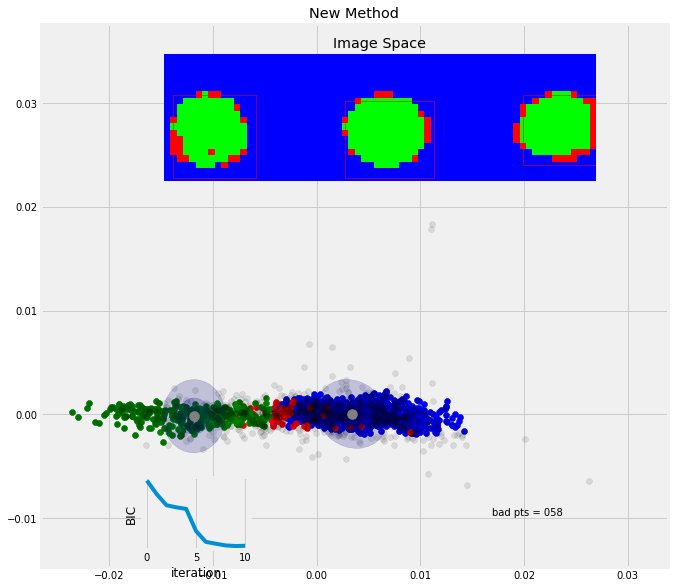

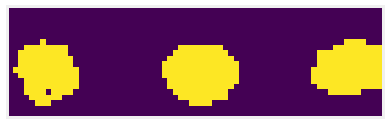

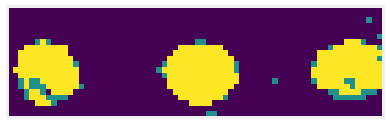

In [31]:
arrowsU,arrowV = I.iterative_gmm(dataset='bb',savegif=True,title='01_good_run',
                binary=True,mode='bgmm',nc = 3,v_and_1=False,
                n_components=2,maxiter=20,thresh=0.8,ra = True)

# arrowsU,arrowV = I.iterative_gmm(dataset='bb',savegif=True,title='01_good_run',
# #                 binary=True,mode='bgmm',nc = 4,v_and_1=False,
# #                 n_components=2,maxiter=20,ra = True)

In [18]:
arrowU_new = np.asarray(arrowsU[0])
arrowV_new = np.asarray(arrowV[0])

In [19]:
for ii in range(1,len(arrowsU)):
    
    arrowU_new = np.concatenate((arrowU_new,np.asarray(arrowsU[ii])),1)
    arrowV_new = np.concatenate((arrowV_new,np.asarray(arrowV[ii])),1)

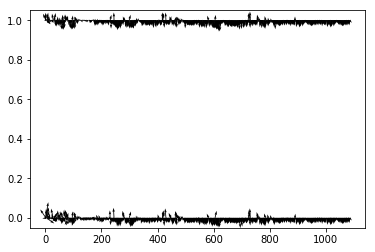

In [21]:
plt.figure()
plt.quiver(arrowV_new,arrowU_new)

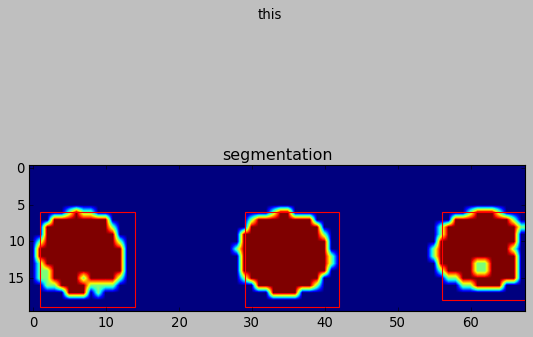

In [472]:
import numpy as np
import scipy.ndimage as ndimage
import scipy.spatial as spatial
import scipy.misc as misc
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

def find_paws(data, smooth_radius = 1, threshold = 0.0001):
    # https://stackoverflow.com/questions/4087919/how-can-i-improve-my-paw-detection
    """Detects and isolates contiguous regions in the input array"""
    # Blur the input data a bit so the paws have a continous footprint 
    data = ndimage.uniform_filter(data, smooth_radius)
    # Threshold the blurred data (this needs to be a bit > 0 due to the blur)
    thresh = data > threshold
    # Fill any interior holes in the paws to get cleaner regions...
    filled = ndimage.morphology.binary_fill_holes(thresh)
    # Label each contiguous paw
    coded_paws, num_paws = ndimage.label(filled)
    # Isolate the extent of each paw
    # find_objects returns a list of 2-tuples: (slice(...), slice(...))
    # which represents a rectangular box around the object
    data_slices = ndimage.find_objects(coded_paws)
    return data_slices

def animate(frame):
    """Detects paws and animates the position and raw data of each frame
    in the input file"""
    # With matplotlib, it's much, much faster to just update the properties
    # of a display object than it is to create a new one, so we'll just update
    # the data and position of the same objects throughout this animation...

    # Since we're making an animation with matplotlib, we need 
    # ion() instead of show()...
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.suptitle('this')

    # Make an image based on the first frame that we'll update later
    # (The first frame is never actually displayed)
    im = ax.imshow(frame)

    # Make 4 rectangles that we can later move to the position of each paw
    rects = [Rectangle((0,0), 1,1, fc='none', ec='red') for i in range(4)]
    [ax.add_patch(rect) for rect in rects]

    title = ax.set_title('Time 0.0 ms')

    # Process and display each frame

    paw_slices = find_paws(frame)

    # Hide any rectangles that might be visible
    [rect.set_visible(False) for rect in rects]

    # Set the position and size of a rectangle for each paw and display it
    for slice, rect in zip(paw_slices, rects):
        dy, dx = slice
        rect.set_xy((dx.start, dy.start))
        rect.set_width(dx.stop - dx.start + 1)
        rect.set_height(dy.stop - dy.start + 1)
        rect.set_visible(True)

    # Update the image data and title of the plot
    title.set_text('segmentation')
    im.set_data(frame)
    im.set_clim([frame.min(), frame.max()])
    fig.canvas.draw()


y_reshape = np.load('bb.npy')
animate(y_reshape)

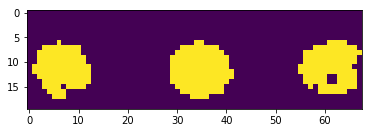

In [25]:
# Since we're making an animation with matplotlib, we need 
# ion() instead of show()...

fig = plt.figure()

# Make an image based on the first frame that we'll update later
# (The first frame is never actually displayed)
im = ax.imshow(y_reshape)

# Make 4 rectangles that we can later move to the position of each paw
rects = [Rectangle((0,0), 1,1, fc='none', ec='red') for i in range(4)]
[ax.add_patch(rect) for rect in rects]

title = ax.set_title('Time 0.0 ms')


paw_slices = find_paws(frame)

# Hide any rectangles that might be visible
[rect.set_visible(False) for rect in rects]

# Set the position and size of a rectangle for each paw and display it
for slice, rect in zip(paw_slices, rects):
    dy, dx = slice
    rect.set_xy((dx.start, dy.start))
    rect.set_width(dx.stop - dx.start + 1)
    rect.set_height(dy.stop - dy.start + 1)
    rect.set_visible(True)

# Update the image data and title of the plot
title.set_text('Time %0.2f ms' % time)
im.set_data(frame)
im.set_clim([frame.min(), frame.max()])
fig.canvas.draw()

(1849600, 2)
(1849600, 2)
(2, 2) (2,)
(2, 2) (2,)


NameError: name 'ax0' is not defined

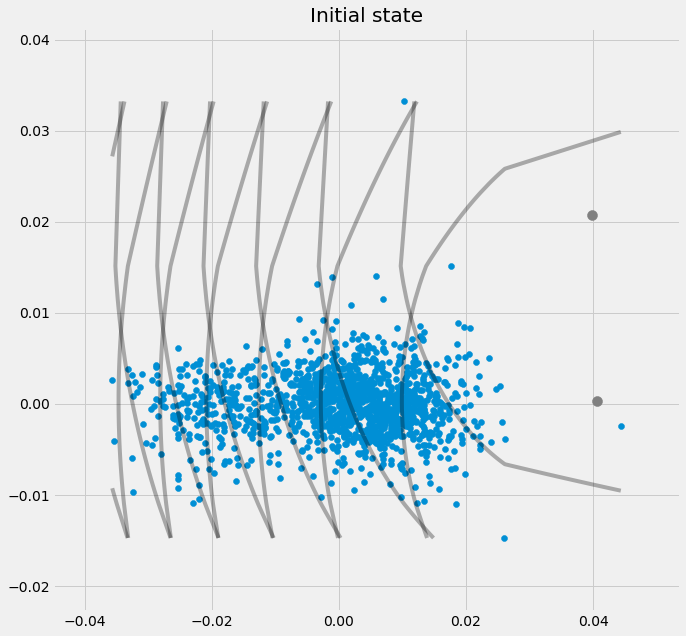

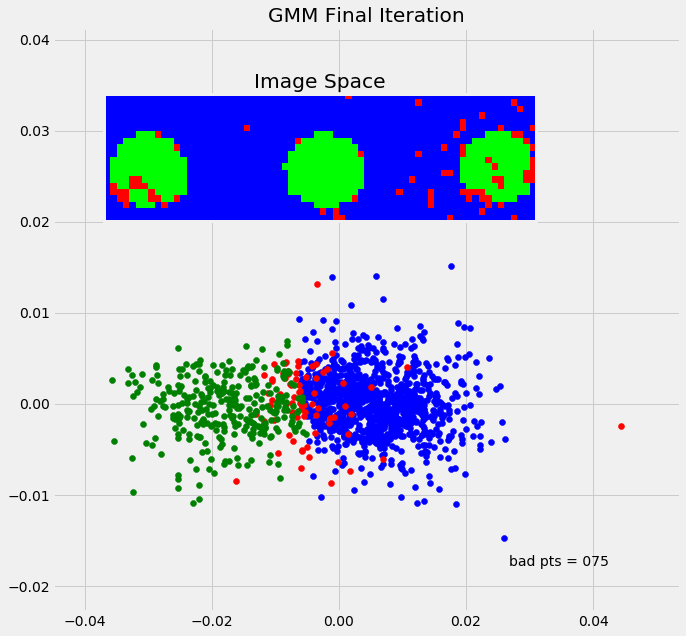

In [25]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from scipy.stats import multivariate_normal


# 0. Create dataset
# X,Y = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=3)
# # Stratch dataset to get ellipsoid data
# X = np.dot(X,np.random.RandomState(0).randn(2,2))
class GMM:
    def __init__(self,X,number_of_sources,iterations,image_dir,l):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.lab = l
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None
        self.imd = image_dir
        
    
    """Define a function which runs for iterations, iterations"""
    def run(self):
        lenx = len(self.X[0])
        self.reg_cov = 1e-6*np.identity(len(self.X[0]))
        x,y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T
        print(self.XY.shape)   
                    
        """ 1. Set the initial mu, covariance and pi values"""
        self.mu = np.random.random(size=(self.number_of_sources,len(self.X[0])))*(max(self.X[:,0]) - min(self.X[:,0])) + min(self.X[:,0]) # This is a nxm matrix since we assume n sources (n Gaussians) where each has m dimensions
        self.cov = np.zeros((self.number_of_sources,len(X[0]),len(X[0]))) # We need a nxmxm covariance matrix for each source since we have m features --> We create symmetric covariance matrices with ones on the digonal
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim],5)
        self.pi = np.ones(self.number_of_sources)/self.number_of_sources # Are "Fractions"
        log_likelihoods = [] # In this list we store the log likehoods per iteration and plot them in the end to check if
                             # if we have converged
            
        """Plot the initial state"""    
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        ax0.scatter(self.X[:,0],self.X[:,1])
        ax0.set_title('Initial state')
        print(self.XY.shape) 
        for m,c in zip(self.mu,self.cov):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
            print(c.shape,m.shape)
        
        for i in range(self.iterations):               
            """E Step"""
            r_ic = np.zeros((len(self.X),len(self.cov)))
            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(len(r_ic[0]))):
                co+=self.reg_cov
                mn = multivariate_normal(mean=m,cov=co)
                r_ic[:,r] = p*mn.pdf(self.X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(X) for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)],axis=0)
            """
            The above calculation of r_ic is not that obvious why I want to quickly derive what we have done above.
            First of all the nominator:
            We calculate for each source c which is defined by m,co and p for every instance x_i, the multivariate_normal.pdf() value.
            For each loop this gives us a 100x1 matrix (This value divided by the denominator is then assigned to r_ic[:,r] which is in 
            the end a 100x3 matrix).
            Second the denominator:
            What we do here is, we calculate the multivariate_normal.pdf() for every instance x_i for every source c which is defined by
            pi_c, mu_c, and cov_c and write this into a list. This gives us a 3x100 matrix where we have 100 entrances per source c.
            Now the formula wants us to add up the pdf() values given by the 3 sources for each x_i. Hence we sum up this list over axis=0.
            This gives us then a list with 100 entries.
            What we have now is FOR EACH LOOP a list with 100 entries in the nominator and a list with 100 entries in the denominator
            where each element is the pdf per class c for each instance x_i (nominator) respectively the summed pdf's of classes c for each 
            instance x_i. Consequently we can now divide the nominator by the denominator and have as result a list with 100 elements which we
            can then assign to r_ic[:,r] --> One row r per source c. In the end after we have done this for all three sources (three loops)
            and run from r==0 to r==2 we get a matrix with dimensionallity 100x3 which is exactly what we want.
            If we check the entries of r_ic we see that there mostly one element which is much larger than the other two. This is because
            every instance x_i is much closer to one of the three gaussians (that is, much more likely to come from this gaussian) than
            it is to the other two. That is practically speaing, r_ic gives us the fraction of the probability that x_i belongs to class
            c over the probability that x_i belonges to any of the classes c (Probability that x_i occurs given the 3 Gaussians).
            """
            """M Step"""
            # Calculate the new mean vector and new covariance matrices, based on the probable membership of the single x_i to classes c --> r_ic
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []
            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:,c],axis=0)
                mu_c = (1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
                self.mu.append(mu_c)
                # Calculate the covariance matrix per source based on the new mean
                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)
                # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source 
                self.pi.append(m_c/np.sum(r_ic)) # Here np.sum(r_ic) gives as result the number of instances. This is logical since we know 
                                                # that the columns of each row of r_ic adds up to 1. Since we add up all elements, we sum up all
                                                # columns per row which gives 1 and then all rows which gives then the number of instances (rows) 
                                                # in X --> Since pi_new contains the fractions of datapoints, assigned to the sources c,
                                                # The elements in pi_new must add up to 1
            

            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))
            #import pdb;pdb.set_trace()
            """
            This process of E step followed by a M step is now iterated a number of n times. In the second step for instance,
            we use the calculated pi_new, mu_new and cov_new to calculate the new r_ic which are then used in the second M step
            to calculat the mu_new2 and cov_new2 and so on....
            """
            fig = plt.figure(figsize=(10,10))
            ax0 = fig.add_subplot(111)
            ax0.scatter(self.X[:,0],self.X[:,1])
            ax0.set_title('GMM {}'.format(format(i,"02")))
            ylim = ax0.get_ylim()
            xlim = ax0.get_xlim()

            for m,c in zip(self.mu,self.cov):
                c += self.reg_cov
                multi_normal = multivariate_normal(mean=m,cov=c)
                ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),levels = 20,colors='black',alpha=0.4)
                ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
            
            # this is an inset axes over the main axes
            a = plt.axes([.15, .5, .6, .4], facecolor='y')
            plt.imshow(-(np.reshape(r_ic.argmax(axis=1), (20,68), order="F") - self.lab),cmap='brg')
            plt.title('Image Space')
            plt.xticks([])
            plt.yticks([])
            
            plt.savefig(self.imd+'{}.png'.format(format(i,"02")))
            plt.close(fig)
            
#         fig2 = plt.figure(figsize=(10,10))
#         ax1 = fig2.add_subplot(111) 
#         ax1.set_title('Log-Likelihood')
#         ax1.plot(range(0,self.iterations,1),log_likelihoods)
        #plt.show()
        ylim = ax0.get_ylim()
        xlim = ax0.get_xlim()
    
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        a = -(r_ic.argmax(axis=1) - np.reshape(self.lab,(1360,), order="F"))
        b = a == -1
        c = a == 0
        d = a == 1
        #import pdb;pdb.set_trace()
        b = [i for i, x in enumerate(b) if x]
        c = [i for i, x in enumerate(c) if x]
        d = [i for i, x in enumerate(d) if x]
        
        ax0.scatter(self.X[b,0],self.X[b,1],c='b')
        ax0.scatter(self.X[c,0],self.X[c,1],c='r')
        ax0.scatter(self.X[d,0],self.X[d,1],c='g')
        ax0.set_title('GMM Final Iteration'.format(format(i,"02")))
        ax0.set_xlim(xlim)
        ax0.set_ylim(ylim)
        plt.text(.5*xlim[-1], ylim[0] + .005,'bad pts = {}'.format(format(len(c),"03")))
        # this is an inset axes over the main axes
        a = plt.axes([.15, .5, .6, .4], facecolor='y')
        plt.imshow(-(np.reshape(r_ic.argmax(axis=1), (20,68), order="F") - self.lab),cmap='brg')
        plt.title('Image Space')
        plt.xticks([])
        plt.yticks([])
        

        plt.savefig(self.imd+'{}.png'.format(format(i +1,"02")))
        plt.savefig(self.imd+'{}.png'.format(format(i +2,"02")))
        plt.savefig(self.imd+'{}.png'.format(format(i +3,"02")))
        #plt.close(fig)
    
    """Predict the membership of an unseen, new datapoint"""
    def predict(self,Y):
        # PLot the point onto the fittet gaussians
#         fig3 = plt.figure(figsize=(10,10))
#         ax2 = fig3.add_subplot(111)
#         ax2.scatter(self.X[:,0],self.X[:,1])
        for m,c in zip(self.mu,self.cov):
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.5,linewidths=2)
            ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
            print(m,c)
            ax0.set_title('Final state')
            for y in Y:
                ax0.scatter(y[0],y[1],c='orange',zorder=10,s=100)
        prediction = []        
        for m,c in zip(self.mu,self.cov):  
            #print(c)
            prediction.append(multivariate_normal(mean=m,cov=c).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(Y) for mean,cov in zip(self.mu,self.cov)]))
        #plt.show()
        return prediction
         
dataset = 'bb'
X = loadmat('2'+dataset)['Z']  
label_true = loadmat('2'+dataset+'_mask')['BW'] 
label_true = np.reshape(label_true, (20,68), order="F")

# Delete all the files in this directory
imd = './images_gmm/'
folder = imd
for the_file in os.listdir(folder):
    file_path = os.path.join(folder, the_file)
    try:
        if os.path.isfile(file_path):
            os.unlink(file_path)
        #elif os.path.isdir(file_path): shutil.rmtree(file_path)
    except Exception as e:
        print(e)
        
GMM = GMM(X,2,40,imd,label_true)     
GMM.run()
GMM.predict([[0.5,0.5]])

1849600

In [26]:
title = 'gmm_real_new'
files = os.listdir(imd)
images = []
for filename in files:
    images.append(imageio.imread(imd+filename))
imageio.mimsave(title + '.mp4', images,fps=4)

In [188]:
imd = './images_gmm/'
files = os.listdir(imd)
images = []
for filename in files:
    images.append(imageio.imread(imd+filename))

In [219]:
imd = './images/'
title = 'gmm_real_all'
files = os.listdir(imd)
images = []
for filename in files:
    images.append(imageio.imread(imd+filename))
    
imageio.mimsave(title + '.mp4', images,fps=2)

FigureCanvasNbAgg()

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


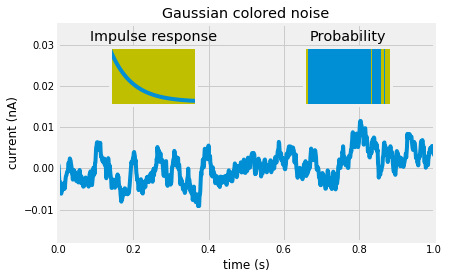

In [27]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05)               # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)]*dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Gaussian colored noise')

# this is an inset axes over the main axes
a = plt.axes([.65, .6, .2, .2], facecolor='y')
a.set_ylim([0,1])
plt.hist(s, 400, normed=1)
plt.title('Probability')
plt.xticks([])
plt.yticks([])

# this is another inset axes over the main axes
a = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
plt.plot(t[:len(r)], r)
plt.title('Impulse response')
plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([])

plt.show()

In [435]:
x.index(0)

AttributeError: 'numpy.ndarray' object has no attribute 'index'